In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jadhavamit","key":"21cbb4e515e911e38a9962bc4bbedb80"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          12280        249  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           6410        105  1.0              
octopusteam/imdb-top-1000-tv-series                          IMDb Top 1000 TV Series                         23KB  2024-10-25 08:00:06           1134         26  1.0              
satvshr/top-4-used-car-sales-datasets-combined               Top 4 Used Car Sales Datasets Combined 

In [8]:
#!kaggle datasets download -d lash45/sun397-50-50

In [9]:
!kaggle datasets download -d dhamur/cotton-plant-disease

Dataset URL: https://www.kaggle.com/datasets/dhamur/cotton-plant-disease
License(s): ODbL-1.0
100% 3.97G/3.98G [01:03<00:00, 83.9MB/s]
100% 3.98G/3.98G [01:03<00:00, 67.2MB/s]


In [10]:
!unzip /content/cotton-plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/contrast_9.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_1.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_10.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_11.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_12.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_13.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_14.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_15.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_16.jpeg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_17.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_18.jpg  
  inflating: Main dataset-20230209T170929Z-0

In [11]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/Cotton leaves/40 Images', output="/content/Cotton leaves/new_1", seed=1337, ratio=(.8, 0.2))

Copying files: 4788 files [00:08, 594.70 files/s]


# For train set:

In [13]:
import os

# base = '/content/Cotton leaves/output/train' 1st old
base = '/content/Cotton leaves/new_1/train' # 1st new


folders = os.listdir(base)

all_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)

    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)

    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]

    all_filenames.append(full_path)

print(all_filenames)

/content/Cotton leaves/new_1/train/Aphids
/content/Cotton leaves/new_1/train/Bacterial blight
/content/Cotton leaves/new_1/train/Healthy
/content/Cotton leaves/new_1/train/Powdery mildew
/content/Cotton leaves/new_1/train/Army worm
/content/Cotton leaves/new_1/train/Target spot
['/content/Cotton leaves/new_1/train/Aphids', '/content/Cotton leaves/new_1/train/Bacterial blight', '/content/Cotton leaves/new_1/train/Healthy', '/content/Cotton leaves/new_1/train/Powdery mildew', '/content/Cotton leaves/new_1/train/Army worm', '/content/Cotton leaves/new_1/train/Target spot']


In [14]:
len(all_filenames)

6

In [15]:
from glob import glob
train_path = '/content/Cotton leaves/output/train'

# useful for getting number of classes
folders = glob(train_path + '/*')
len(folders)

0

# For test set

In [17]:
import os

# base = '/content/Cotton leaves/output/test' 2nd change
base = '/content/Cotton leaves/new_1/val' # 2nd new

folders = os.listdir(base)

all_test_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)

    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)

    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]

    all_test_filenames.append(full_path)

print(all_test_filenames)

/content/Cotton leaves/new_1/val/Aphids
/content/Cotton leaves/new_1/val/Bacterial blight
/content/Cotton leaves/new_1/val/Healthy
/content/Cotton leaves/new_1/val/Powdery mildew
/content/Cotton leaves/new_1/val/Army worm
/content/Cotton leaves/new_1/val/Target spot
['/content/Cotton leaves/new_1/val/Aphids', '/content/Cotton leaves/new_1/val/Bacterial blight', '/content/Cotton leaves/new_1/val/Healthy', '/content/Cotton leaves/new_1/val/Powdery mildew', '/content/Cotton leaves/new_1/val/Army worm', '/content/Cotton leaves/new_1/val/Target spot']


In [25]:
valid_path = '/content/Cotton leaves/new_1/val'

test_folders = glob(valid_path+ '/*')

len(test_folders)

6

# USING RESNET

In [26]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools

In [27]:
# re-size all the images to this
IMAGE_SIZE = [256, 256] # feel free to change depending on dataset

# training config:
epochs = 15
batch_size = 32

In [28]:
train_path = '/content/Cotton leaves/new_1/train'
valid_path = '/content/Cotton leaves/new_1/val'

In [29]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [30]:
# useful for getting number of classes
folders = glob(train_path + '/*')

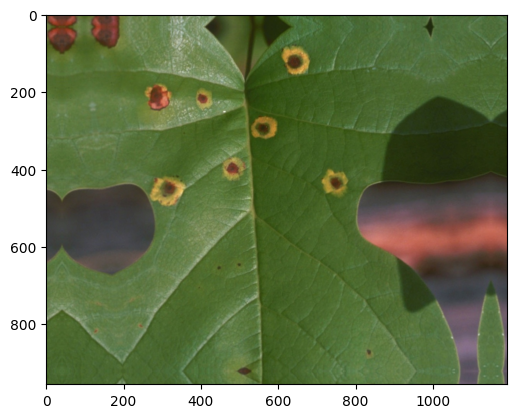

In [31]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)));

In [32]:
len(folders)

6

In [33]:
# resnet base
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [34]:
# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [35]:
# our layers - you can add more if you want
x = Flatten()(res.output)
# x = Dense(1000, activation='relu')(x) # example
prediction = Dense(len(folders), activation='softmax')(x)

In [36]:
# create a model object
model = Model(inputs=res.input, outputs=prediction)

In [37]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,374,150 (92.98 MB)

 Trainable params: 786,438 (3.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# create an instance of ImageDataGenerator
train_gen = ImageDataGenerator(
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [40]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 958 images belonging to 6 classes.
{'Aphids': 0, 'Army worm': 1, 'Bacterial blight': 2, 'Healthy': 3, 'Powdery mildew': 4, 'Target spot': 5}


min: -123.68 max: 151.061


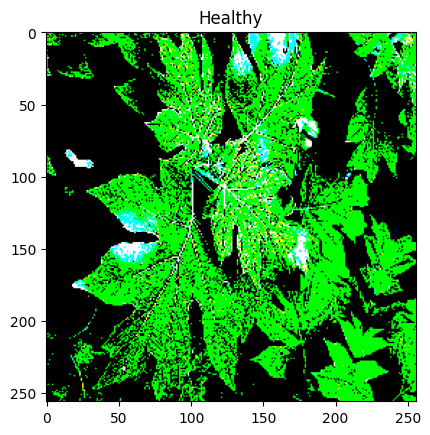

In [41]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [42]:
# create generators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 3830 images belonging to 6 classes.
Found 958 images belonging to 6 classes.


In [43]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 1335s 11s/step - accuracy: 0.6957 - loss: 8.9076 - val_accuracy: 0.9461 - val_loss: 1.2605
Epoch 2/15
  1/119 ━━━━━━━━━━━━━━━━━━━━ 13:43 7s/step - accuracy: 0.9062 - loss: 0.7162

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.9062 - loss: 0.7162 - val_accuracy: 0.9333 - val_loss: 0.6758
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 1318s 11s/step - accuracy: 0.9425 - loss: 1.1374 - val_accuracy: 0.9386 - val_loss: 1.2572
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8750 - loss: 2.6601 - val_accuracy: 0.9333 - val_loss: 1.8269
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 1315s 11s/step - accuracy: 0.9491 - loss: 1.1692 - val_accuracy: 0.9591 - val_loss: 0.9710
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9688 - loss: 1.0526 - val_accuracy: 0.9333 - val_loss: 1.4459
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 1314s 11s/step - accuracy: 0.9642 - loss: 0.7948 - val_accuracy: 0.9677 - val_loss: 1.2595
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 1.0000 - loss: 4.5081e-05 - val_accuracy: 0.8333 - val_loss: 7.7192
Epoch 9/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 1331s 11s/step - accuracy: 0.9704 - loss: 0.7868 - val

In [44]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [45]:
model.save('cotton_disease_model.h5')

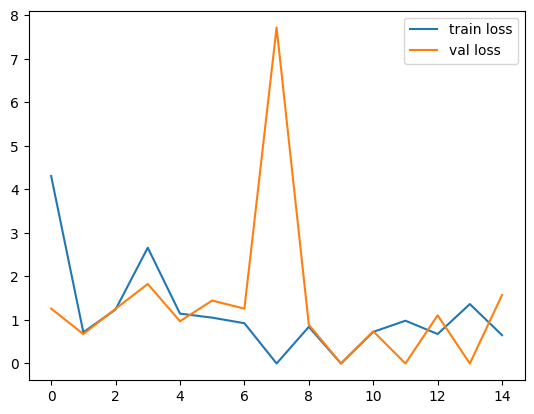

In [46]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

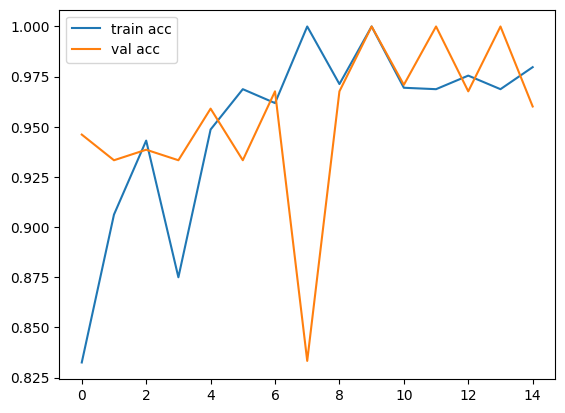

In [47]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [48]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  n_images = 0
  for x, y in val_gen.flow_from_directory(
      data_path,
      target_size=IMAGE_SIZE,
      shuffle=False,
      batch_size=batch_size * 2):
    i += 1
    n_images += len(y)
    if i % 50 == 0:
      print(f'{n_images} images processed.')
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [49]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

Generating confusion matrix 3830
Found 3830 images belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 11s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 14s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/s

valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

In [51]:
from keras.models import load_model
# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
# class_names = train_dataset.class_names

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model2 = load_model('cotton_disease_model.h5')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = load_img('/content/Diagnosis-Management-Foliar-Diseases-3.jpg', target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(x, batch_size=32)
index = np.argmax(classes,axis=1)[0]
print(labels[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Target spot


In [52]:
from keras.models import load_model
# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
# class_names = train_dataset.class_names

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model2 = load_model('cotton_disease_model.h5')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = load_img('/content/test_img2.webp', target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(x, batch_size=32)
index = np.argmax(classes,axis=1)[0]
print(labels[index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Powdery mildew


In [53]:
def predict_disease(img_path = ''):
  from keras.models import load_model
  # from keras.preprocessing import image
  from keras.utils import load_img, img_to_array
  import numpy as np
  # class_names = train_dataset.class_names

  # dimensions of our images
  img_width, img_height = 256, 256

  # load the model we saved
  model2 = load_model('cotton_disease_model.h5')
  model2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # predicting images
  img = load_img(img_path, target_size=(img_width,img_height))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(x, batch_size=32)
  index = np.argmax(classes,axis=1)[0]
  print(labels[index])

In [54]:
predict_disease('/content/Diagnosis-Management-Foliar-Diseases-3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Target spot


In [55]:
predict_disease('/content/test_img2.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Powdery mildew


In [ ]:
labels

In [ ]:
# Intergrate two models refer below code

In [56]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the cotton plant classifier model
plant_model = load_model('cotton_plant_classifier.h5')

# Load the cotton disease classifier model
disease_model = load_model('cotton_disease_classifier.h5')

# Define a function to process the input image
def process_image(image_path):
    # Load the image and resize it
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    # Convert the image to a 4D tensor
    image = np.expand_dims(image, axis=0)

    # Pass the image through the plant classifier
    plant_prediction = plant_model.predict(image)[0]

    # If the plant is not cotton, return None
    if plant_prediction[0] > plant_prediction[1]:
        return None

    # Pass the image through the disease classifier
    disease_prediction = disease_model.predict(image)[0]

    # Get the index of the predicted disease class
    disease_index = np.argmax(disease_prediction)

    # Get the predicted disease class label
    disease_labels = ['disease1', 'disease2', 'disease3', 'disease4']
    disease_label = disease_labels[disease_index]

    # Return the predicted disease label
    return disease_label

# Test the function with an example image
image_path = 'test_image.jpg'
disease_label = process_image(image_path)
print('Predicted disease:', disease_label)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cotton_plant_classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:

### Confusion matrix

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Define the data directories
test_dir = '/content/Cotton leaves/new_1/val'

# Create the data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224), # Set the size of your input images
        batch_size=1, # Set to 1 for prediction on a single image
        class_mode='categorical', # Use 'categorical' if you have more than 2 classes
        shuffle=False) # Don't shuffle the test set, so that the predictions match the true labels

# Load the saved model
model = load_model('/content/cotton_disease_model20.h5')

# Use the model to generate predictions on the test set
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
predicted_labels = np.argmax(predictions, axis=1) # Convert the predicted probabilities to class labels

# Get the true labels for the test set
true_labels = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(cm)
